In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import chardet
import glob
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import sys
import cfunits

# import custom modules
sys.path.append('../scripts')
import funcs

# Load separate tables and merge

### E.g., "Broadleaf_deciduous_liana_tropical_utf8.csv"
`if str.startswith('Broadleaf') or str.startswith('Needleleaf')`
- Broadleaf = 'Funtype'
- deciduous = 'Funtype'
- liana = 'Plantform'
- tropical = 'Tregion'

### E.g., "C3_Crop_utf8"
`if str.startswith('C3') or str.startswith('C4')`
- C3 = 'Pathway'
- Crop = 'Plantform'

`if str == 'C4_Grass_andropogon_gerardii_utf8.csv`
- C4 = 'Pathway'
- Grass = 'Plantform'

`if str == 'Cornus_racemosa_Cuyzam_utf8.csv'`
- no additional columns

In [2]:
filename = 'han_2022'

In [3]:
# get list of files
directory_path = f'../data/input/{filename}/data_files'
path_list = glob.glob(f'{directory_path}/*.csv')
path_list

['../data/input/han_2022/data_files/C4_Crop.csv',
 '../data/input/han_2022/data_files/Broadleaf_deciduous_liana_tropical.csv',
 '../data/input/han_2022/data_files/Broadleaf_evergreen_tree_tropical.csv',
 '../data/input/han_2022/data_files/C4_Grass_andropogon_gerardii.csv',
 '../data/input/han_2022/data_files/C3_Crop.csv',
 '../data/input/han_2022/data_files/Needleaf_evergreen_tree_boreal.csv',
 '../data/input/han_2022/data_files/Cornus_racemosa_Cuyzam.csv',
 '../data/input/han_2022/data_files/Broadleaf_deciduous_shrub_temperate.csv',
 '../data/input/han_2022/data_files/C3_Grass.csv',
 '../data/input/han_2022/data_files/C4_Grass.csv',
 '../data/input/han_2022/data_files/Broadleaf_deciduous_tree_temperate.csv',
 '../data/input/han_2022/data_files/Broadleaf_deciduous_tree_tropical.csv',
 '../data/input/han_2022/data_files/Broadleaf_deciduous_tree_boreal.csv']

In [4]:
# get file names only
file_list = [os.path.basename(path).replace('.csv', '') for path in path_list]

# treat files differently depending on name
dfs = []
for file, path in zip(file_list, path_list):

    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()
    words = file.split('_')

    if file.startswith('Broadleaf') or file.startswith('Needleleaf'):

        # add columns
        df['Funtype'] = words[0] + ' ' + words[1]
        df['Plantform'] = words[2]
        df['Tregion'] = words[3]

        dfs.append(df)

    elif file.startswith('C3') or file.startswith('C4'):

        # add columns
        df['Pathway'] = words[0]
        df['Plantform'] = words[1]

        dfs.append(df)

    elif file == 'Cornus_racemosa_Cuyzam_utf8':  # Adjusted since '.csv' was removed

        dfs.append(df)

In [5]:
data = pd.concat(dfs, axis=0)
data

,Species name,Tleaf,LeafReplicateNumber,PARi,CO2R,Ci,Anet,Fm',Fs,VpdL,Press,OxygenPress,Fo,Fm,Pathway,Plantform,Funtype,Tregion
0,Zea mays L.,25.0,1,1200.1,400.4403,149.8772,33.29238,582.0,378.0,1.383137,98.95,21,395.0,1444.0,C4,Crop,NaN,NaN
1,Zea mays L.,25.0,1,999.2,400.9609,155.0055,30.19987,634.0,388.0,1.419416,98.95,21,395.0,1444.0,C4,Crop,NaN,NaN
2,Zea mays L.,25.0,1,800.9,401.0883,164.6963,26.56009,692.0,393.0,1.452015,98.95,21,395.0,1444.0,C4,Crop,NaN,NaN
3,Zea mays L.,25.0,1,500.3,400.0020,208.1738,18.52931,786.0,389.0,1.492717,98.95,21,395.0,1444.0,C4,Crop,NaN,NaN
4,Zea mays L.,25.0,1,299.4,401.0790,262.0181,11.33605,860.0,385.0,1.529302,98.95,21,395.0,1444.0,C4,Crop,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Betula papyrifera,25.0,3,2001.0,550.2006,304.9796,17.60424,528.0,442.0,1.539059,97.72,21,362.0,1757.0,NaN,tree,Broadleaf deciduous,boreal
116,Betula papyrifera,25.0,3,2001.0,799.9424,488.4513,22.41847,548.0,454.0,1.544358,97.71,21,362.0,1757.0,NaN,tree,Broadleaf deciduous,boreal
117,Betula papyrifera,25.0,3,2001.0,998.6649,661.4535,24.52719,549.0,457.0,1.536525,97.71,21,362.0,1757.0,NaN,tree,Broadleaf deciduous,boreal
118,Betula papyrifera,25.0,3,2001.0,1202.2010,849.2018,25.41847,548.0,456.0,1.544612,97.70,21,362.0,1757.0,NaN,tree,Broadleaf deciduous,boreal


# Add metadata to all_data as 3 multi-headers

In [6]:
# Read the metadata file
metadata = pd.read_csv(f'../data/input/{filename}/han_2022_metadata.txt', delimiter=':', names=['Variable', 'Description'])

# Extract units from the Description
metadata['Unit'] = metadata['Description'].str.extract(r'in ([\w\s\-\u00B5%/]+)').fillna(np.nan)

# Clean up the Variable names by stripping whitespace
metadata['Variable'] = metadata['Variable'].str.strip()

# Set specific variable units
metadata.loc[metadata['Variable'] == 'Species name', 'Unit'] = 1
metadata.loc[metadata['Variable'] == 'Tleaf', 'Unit'] = 'degree_C'
metadata.loc[metadata['Variable'] == 'LeafReplicateNumber', 'Unit'] = 1

metadata

,Variable,Description,Unit
0,Species name,species,1
1,Tleaf,leaf temperature in °C,degree_C
2,LeafReplicateNumber,replicate number for individual leaf,1
3,PARi,photosynthetically active radiation in µmol m...,µmol m-2 s-1
4,CO2R,reference CO2 concentration in µmol mol-1,µmol mol-1
5,Ci,intercellular CO2 concentration in µmol mol-1,µmol mol-1
6,Anet,net photosynthesis in µmol m-2 s-1,µmol m-2 s-1
7,Fm',maximum chlorophyll a fluorescence under ligh...,mV
8,Fs,steady-state chlorophyll a fluorescence under...,mV
9,VpdL,leaf-to-air vapour pressure deficit in kPa,kPa


In [7]:
# Check for variables in data that are not in metadata
for col in data.columns.get_level_values(0).to_list():
    if col not in metadata['Variable'].values.tolist():
        # Append a new row to metadata with NaN for Description and Unit
        new_row = pd.DataFrame([[col, np.nan, np.nan]], columns=metadata.columns)  # Use a list of lists
        metadata = pd.concat([metadata, new_row], ignore_index=True)  # Reset index to avoid conflicts

metadata

,Variable,Description,Unit
0,Species name,species,1
1,Tleaf,leaf temperature in °C,degree_C
2,LeafReplicateNumber,replicate number for individual leaf,1
3,PARi,photosynthetically active radiation in µmol m...,µmol m-2 s-1
4,CO2R,reference CO2 concentration in µmol mol-1,µmol mol-1
5,Ci,intercellular CO2 concentration in µmol mol-1,µmol mol-1
6,Anet,net photosynthesis in µmol m-2 s-1,µmol m-2 s-1
7,Fm',maximum chlorophyll a fluorescence under ligh...,mV
8,Fs,steady-state chlorophyll a fluorescence under...,mV
9,VpdL,leaf-to-air vapour pressure deficit in kPa,kPa


In [8]:
metadata.columns = metadata.columns.str.strip()
metadata['Variable'] = metadata['Variable'].str.strip()
new_header = pd.MultiIndex.from_arrays([
    metadata['Variable'],
    metadata['Description'],  # Descriptions
    metadata['Unit']  # Units
])

# Step 2: Apply the multi-level header to all_data
data.columns = new_header
data

Variable,Species name,Tleaf,LeafReplicateNumber,PARi,CO2R,Ci,Anet,Fm',Fs,VpdL,Press,OxygenPress,Fo,Fm,Pathway,Plantform,Funtype,Tregion
Description,species,leaf temperature in °C,replicate number for individual leaf,photosynthetically active radiation in µmol m-2 s-1,reference CO2 concentration in µmol mol-1,intercellular CO2 concentration in µmol mol-1,net photosynthesis in µmol m-2 s-1,maximum chlorophyll a fluorescence under light in mV,steady-state chlorophyll a fluorescence under light in mV,leaf-to-air vapour pressure deficit in kPa,air pressure in kPa,the pressure of oxygen in kPa,minimum chlorophyll a fluorescence under fully dark-adapted conditions in mV,maximum chlorophyll a fluorescence under fully dark-adapted conditions in mV,NaN,NaN,NaN,NaN
Unit,1,degree_C,1,µmol m-2 s-1,µmol mol-1,µmol mol-1,µmol m-2 s-1,mV,mV,kPa,kPa,kPa,mV,mV,NaN,NaN,NaN,NaN
0,Zea mays L.,25.0,1,1200.1,400.4403,149.8772,33.29238,582.0,378.0,1.383137,98.95,21,395.0,1444.0,C4,Crop,NaN,NaN
1,Zea mays L.,25.0,1,999.2,400.9609,155.0055,30.19987,634.0,388.0,1.419416,98.95,21,395.0,1444.0,C4,Crop,NaN,NaN
2,Zea mays L.,25.0,1,800.9,401.0883,164.6963,26.56009,692.0,393.0,1.452015,98.95,21,395.0,1444.0,C4,Crop,NaN,NaN
3,Zea mays L.,25.0,1,500.3,400.0020,208.1738,18.52931,786.0,389.0,1.492717,98.95,21,395.0,1444.0,C4,Crop,NaN,NaN
4,Zea mays L.,25.0,1,299.4,401.0790,262.0181,11.33605,860.0,385.0,1.529302,98.95,21,395.0,1444.0,C4,Crop,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Betula papyrifera,25.0,3,2001.0,550.2006,304.9796,17.60424,528.0,442.0,1.539059,97.72,21,362.0,1757.0,NaN,tree,Broadleaf deciduous,boreal
116,Betula papyrifera,25.0,3,2001.0,799.9424,488.4513,22.41847,548.0,454.0,1.544358,97.71,21,362.0,1757.0,NaN,tree,Broadleaf deciduous,boreal


---
---
## 2. Prepare data headers <a class="anchor" id="prep-headers"></a>
Add variable/description/units to as a 3-row multi-header

---
### 2.1. Preview headers, descriptions, and units <a class="anchor" id="view-headers"></a>

In [9]:
data.columns.get_level_values(0)

Index(['Species name', 'Tleaf', 'LeafReplicateNumber', 'PARi', 'CO2R', 'Ci',
       'Anet', 'Fm'', 'Fs', 'VpdL', 'Press', 'OxygenPress', 'Fo', 'Fm',
       'Pathway', 'Plantform', 'Funtype', 'Tregion'],
      dtype='object', name='Variable')

In [10]:
data.columns.get_level_values(1)

Index([                                                                      ' species',
                                                              ' leaf temperature in °C',
                                                ' replicate number for individual leaf',
                                 ' photosynthetically active radiation in µmol m-2 s-1',
                                           ' reference CO2 concentration in µmol mol-1',
                                       ' intercellular CO2 concentration in µmol mol-1',
                                                  ' net photosynthesis in µmol m-2 s-1',
                               ' maximum chlorophyll a fluorescence under light in mV ',
                          ' steady-state chlorophyll a fluorescence under light in mV ',
                                          ' leaf-to-air vapour pressure deficit in kPa',
                                                                 ' air pressure in kPa',
                     

In [11]:
data.columns.get_level_values(2)

Index([             1,     'degree_C',              1, 'µmol m-2 s-1',
         'µmol mol-1',   'µmol mol-1', 'µmol m-2 s-1',          'mV ',
                'mV ',          'kPa',          'kPa',          'kPa',
                'mV ',          'mV ',            nan,            nan,
                  nan,            nan],
      dtype='object', name='Unit')

---
### 2.2. Clean headers, descriptions, and units <a class="anchor" id="clean-headers"></a>

#### 2.2.1. Units (multi-header index 2) <a class="anchor" id="units"></a>
Some examples of correct unit formats:
* mmol m-2 s-1
* m-2 s-1
* 1 (for unitless values or categorical data)
* degree_C
* degree (for decimal degrees)

In [12]:
# clean units using local modules in funcs.py: funcs.clean_values()
values = data.columns.get_level_values(2)
cleaned_l2_values = funcs.clean_values(values)

# replace unclean units with cleaned units
data.columns = pd.MultiIndex.from_arrays([
    data.columns.get_level_values(0),
    data.columns.get_level_values(1),
    cleaned_l2_values
])

#### 2.2.2. Descriptions (multi-header index 1) <a class="anchor" id="descriptions"></a>

In [13]:
# clean descriptions using local modules in funcs.py: funcs.clean_values()
values = data.columns.get_level_values(1)
cleaned_l1_values = funcs.clean_values(values)

# replace unclean descriptions with cleaned descriptions
data.columns = pd.MultiIndex.from_arrays([
    data.columns.get_level_values(0),
    cleaned_l1_values,
    data.columns.get_level_values(2),
])

#### 2.2.3. Variables (multi-header index 0) <a class="anchor" id="variables"></a>

In [14]:
values = data.columns.get_level_values(0)
cleaned_l0_values = funcs.clean_values(values)
data.columns = pd.MultiIndex.from_arrays([
    cleaned_l0_values,
    data.columns.get_level_values(1),
    data.columns.get_level_values(2),
])

#### 2.2.4 Data values
* Ensure proper encoding ('NFKC' Unicode)
* Convert string 1 to integer 1

In [15]:
# Apply normalization to all multiheader rows
data = data.sort_index(axis=1)
data_norm = funcs.encode_dataframe_values(data)
header_df = pd.DataFrame({
    'variable': data_norm.columns.get_level_values(0),
    'description': data_norm.columns.get_level_values(1),
    'unit': data_norm.columns.get_level_values(2)
})

# Display the resulting DataFrame
header_df.head(5)

,variable,description,unit
0,Anet,net photosynthesis in μmol m-2 s-1,μmol m-2 s-1
1,CO2R,reference CO2 concentration in μmol mol-1,μmol mol-1
2,Ci,intercellular CO2 concentration in μmol mol-1,μmol mol-1
3,Fm,maximum chlorophyll a fluorescence under fully...,mV
4,Fm,maximum chlorophyll a fluorescence under light...,mV


In [16]:
header_df.to_csv(f'../data/temp/headers/{filename}_headers.csv', index=None, encoding='utf-8-sig')

---
---
## 3. Standardize variables, descriptions, & units with Lookup Table
</br>

---
### 3.1. First, create a copy of `../data/temp/headers/{filename}_headers.csv` at `../data/temp/headers/{filename}_headers_lookup.csv`
</br>

---
### 3.2. Name the headers `variable`, `description`, `unit`, `standard_variable`, `standard_description`, `standard_Unit`
</br>

---
### 3.3. Using ESS-Dive leaf-gas-exchange standards, assign the `standard_variable`, `standard_description`, & `standard_unit` for each variable, description, & unit
This manual process will allow us to assign standardized headers in preparation for merging into the final database; data can't be merged if they don't have identical headers
* https://github.com/ess-dive-community/essdive-leaf-gas-exchange
</br>

---
### 3.4. Load the lookup table

In [17]:
# Load and set encoding of the lookup table
lookup_table = pd.read_csv(f'../data/temp/headers/{filename}_headers_lookup.csv', encoding='utf-8-sig')
lookup_table = funcs.encode_dataframe_values(lookup_table)
lookup_table.head(3)

,variable,description,unit,standard_variable,standard_description,standard_unit
0,Anet,net photosynthesis in μmol m-2 s-1,μmol m-2 s-1,A,Net CO2 exchange per leaf area,μmol m-2 s-1
1,CO2R,reference CO2 concentration in μmol mol-1,μmol mol-1,CO2r,CO2 concentration in wet air entering chamber,μmol mol-1
2,Ci,intercellular CO2 concentration in μmol mol-1,μmol mol-1,Ci,Intercellular CO2 concentration in air,μmol mol-1


In [18]:
# look at duplicates and determine how to handle them
column_name = 'standard_variable'
duplicate_rows = lookup_table[lookup_table.duplicated(subset=[column_name], keep=False)]
duplicate_rows

,variable,description,unit,standard_variable,standard_description,standard_unit
3,Fm,maximum chlorophyll a fluorescence under fully...,mV,Fm,maximum chlorophyll a fluorescence under fully...,mV
4,Fm,maximum chlorophyll a fluorescence under light...,mV,Fm,maximum chlorophyll a fluorescence under light...,mV
7,Funtype,NaN,NaN,plantForm,"Life form of the plant, categorizing it as tre...",1
12,Plantform,NaN,NaN,plantForm,"Life form of the plant, categorizing it as tre...",1


---
### 3.5. Standardize the header using lookup table

In [19]:
# Standardize variable/description but keep original unit
lookup_dict = lookup_table.set_index(['variable', 'description', 'unit']).to_dict('index')
standard_data = funcs.standardize_headers(data_norm, lookup_dict)

In [20]:
standard_data

standard_variable                                 A  \
standard_description Net CO2 exchange per leaf area   
unit                                   μmol m-2 s-1   
0                                          33.29238   
1                                          30.19987   
2                                          26.56009   
3                                          18.52931   
4                                          11.33605   
..                                              ...   
115                                        17.60424   
116                                        22.41847   
117                                        24.52719   
118                                        25.41847   
119                                        25.70034   

standard_variable                                             CO2r  \
standard_description CO2 concentration in wet air entering chamber   
unit                                                    μmol mol-1   
0                                                         400.4403   
1                                                         400.9609   
2                                                         401.0883   
3                                                         400.0020   
4                                                         401.0790   
..                                                             ...   
115                                                       550.2006   
116                                                       799.9424   
117                                                       998.6649   
118                                                      1202.2010   
119                                                      1502.3720   

standard_variable                                        Ci  \
standard_description Intercellular CO2 concentration in air   
unit                                             μmol mol-1   
0                                                  149.8772   
1                                                  155.0055   
2                                                  164.6963   
3                                                  208.1738   
4                                                  262.0181   
..                                                      ...   
115                                                304.9796   
116                                                488.4513   
117                                                661.4535   
118                                                849.2018   
119                                               1138.0080   

standard_variable                                                                              Fm  \
standard_description maximum chlorophyll a fluorescence under fully dark-adapted conditions in mV   
unit                                                                                           mV   
0                                                                1444.0                             
1                                                                1444.0                             
2                                                                1444.0                             
3                                                                1444.0                             
4                                                                1444.0                             
..                                                                  ...                             
115                                                              1757.0                             
116                                                              1757.0                             
117                                                              1757.0                             
118                                                              1757.0                             
119                                                 

In [21]:
# this file was manually curated based on info from _variables csvs
column_standards = pd.read_csv('../data/supp/columns_of_interest.csv')

# Use Unicode escape codes for clarity
mu = '\u03BC'  # Greek small letter mu (μ)
micro = '\u00B5'  # Micro sign (µ)
column_standards = column_standards.replace({mu: micro}, regex=True)

# set encoding to match our data
column_standards = funcs.encode_dataframe_values(column_standards)
column_standards.drop_duplicates(inplace=True)
column_standards

,standard_variable,standard_description,standard_unit
0,siteIdentifier,Location descriptor of where data was collected,1
1,speciesCode,Code used to identify species in data tables,1
2,record,Observation record number,1
3,date,Date of observation,1
4,time,Time of observation,1
5,measurementDevice,Name of the instrument that collected data,1
6,Tleaf,Leaf surface temperature,degree_C
7,A,Net CO2 exchange per leaf area,μmol m-2 s-1
8,Ci,Intercellular CO2 concentration in air,μmol mol-1
9,CO2s,CO2 concentration in wet air inside chamber,μmol mol-1


In [22]:
# Create the set of tuples from column_standards
valid_columns = set(zip(column_standards['standard_variable'], column_standards['standard_description']))

# Extract the tuples from the first two rows of the multi-header columns in standard_data
multi_header_tuples = [
    (standard_data.columns.get_level_values(0)[i], standard_data.columns.get_level_values(1)[i])
    for i in range(len(standard_data.columns))
]

# Subselect columns in standard_data whose tuples match the valid_columns set
selected_columns = [col for col, header_tuple in zip(standard_data.columns, multi_header_tuples) if header_tuple in valid_columns]

# Create a new DataFrame with the selected columns
filtered_standard_data = standard_data[selected_columns]
filtered_standard_data.head(3)

standard_variable,A,CO2r,Ci,plantForm,replicate,Oatm,Patm,species,Tleaf,plantBiome,VPDleaf
standard_description,Net CO2 exchange per leaf area,CO2 concentration in wet air entering chamber,Intercellular CO2 concentration in air,"Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function",Identification number indicating if a plant was measured more than once,The pressure of oxygen in the air,Atmospheric pressure of the air,Full species name and subspecies if applicable,Leaf surface temperature,"Classification of the biome based on climate and ecological characteristics, such as arctic, boreal, temperate, or tropical",Leaf to air vapor pressure deficit
unit,μmol m-2 s-1,μmol mol-1,μmol mol-1,1,1,kPa,kPa,1,degree_C,1,kPa
0,33.29238,400.4403,149.8772,"Funtype: None, Plantform: Crop",1,21,98.95,Zea mays L.,25.0,NaN,1.383137
1,30.19987,400.9609,155.0055,"Funtype: None, Plantform: Crop",1,21,98.95,Zea mays L.,25.0,NaN,1.419416
2,26.56009,401.0883,164.6963,"Funtype: None, Plantform: Crop",1,21,98.95,Zea mays L.,25.0,NaN,1.452015


In [23]:
# add missing columns (manually derived from the manuscript)
misc_cols = pd.read_csv(f'../data/input/{filename}/han_2022_misc_info.csv', header=[0, 1, 2])
# Convert the third level in misc_cols' MultiIndex columns
misc_cols.columns = pd.MultiIndex.from_tuples([
    (col[0], col[1], int(col[2]) if isinstance(col[2], str) and col[2].isdigit() else col[2])
    for col in misc_cols.columns
])

In [24]:
# Create a new single-level species key in filtered_standard_data
filtered_standard_data['species_key'] = filtered_standard_data[
    ('species', 'Full species name and subspecies if applicable', 1)
]

# Create a new single-level species key in misc_cols
misc_cols['species_key'] = misc_cols[
    ('species', 'Full species name and subspecies if applicable', 1)
]

# Merge using the new species_key column with an indicator to track matches
merged_df = filtered_standard_data.merge(
    misc_cols,
    on='species_key',
    how='left',
    indicator=True
)

# Identify rows in filtered_standard_data that did not have a match in misc_cols
unmatched_species = merged_df[merged_df['_merge'] == 'left_only']
unmatched_species['species_key'].unique()

/var/folders/3s/1n6wl8w52cb_9hst_c95fb9h0000gp/T/ipykernel_28766/3979490824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_standard_data['species_key'] = filtered_standard_data[
/var/folders/3s/1n6wl8w52cb_9hst_c95fb9h0000gp/T/ipykernel_28766/3979490824.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = filtered_standard_data.merge(
/var/folders/3s/1n6wl8w52cb_9hst_c95fb9h0000gp/T/ipykernel_28766/3979490824.py:12: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  merged_df = filtered_standard_data.merge(
/var/folders/3s/1n6wl8w52cb_9hst_c95fb9h0000gp/T/ipykernel_28766/3979490824.py:12: PerformanceWarni

array(['Liriodendron tulipifera L', 'Quercus falcata Michx ',
       'Quercus shumardii Buckl'], dtype=object)

In [25]:
# fix species name issues I found using the code below:
def fix_species_name(name):
    """
    Strip extra whitespace and, for specific species, add a trailing period.
    """
    name = name.strip()  # remove extra whitespace
    corrections = {
        "Liriodendron tulipifera L": "Liriodendron tulipifera L.",
        "Quercus falcata Michx": "Quercus falcata Michx.",
        "Quercus shumardii Buckl": "Quercus shumardii Buckl."
    }
    return corrections.get(name, name)

# Create a new single-level species key in filtered_standard_data
filtered_standard_data['species_key'] = filtered_standard_data[
    ('species', 'Full species name and subspecies if applicable', 1)
].apply(fix_species_name)

# Create a new single-level species key in misc_cols
misc_cols['species_key'] = misc_cols[
    ('species', 'Full species name and subspecies if applicable', 1)
].apply(fix_species_name)

# Merge using the new species_key column with an indicator to track matches
merged_df = filtered_standard_data.merge(
    misc_cols,
    on='species_key',
    how='left',
    indicator=True
)

# Identify rows in filtered_standard_data that did not have a match in misc_cols
unmatched_species = merged_df[merged_df['_merge'] == 'left_only']
unmatched_species['species_key'].unique()

/var/folders/3s/1n6wl8w52cb_9hst_c95fb9h0000gp/T/ipykernel_28766/273719062.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_standard_data['species_key'] = filtered_standard_data[
/var/folders/3s/1n6wl8w52cb_9hst_c95fb9h0000gp/T/ipykernel_28766/273719062.py:25: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = filtered_standard_data.merge(
/var/folders/3s/1n6wl8w52cb_9hst_c95fb9h0000gp/T/ipykernel_28766/273719062.py:25: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  merged_df = filtered_standard_data.merge(
/var/folders/3s/1n6wl8w52cb_9hst_c95fb9h0000gp/T/ipykernel_28766/273719062.py:25: PerformanceWarning:

array([], dtype=object)

In [26]:
merged_df = merged_df.drop(columns=['species_key', '_merge', 'species_y'])
merged_df = merged_df.rename(columns={'species_x':'species'})
filtered_standard_data = merged_df.copy()

/var/folders/3s/1n6wl8w52cb_9hst_c95fb9h0000gp/T/ipykernel_28766/1112947576.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = merged_df.drop(columns=['species_key', '_merge', 'species_y'])


Visualizing ('A', 'Net CO2 exchange per leaf area', 'μmol m-2 s-1')


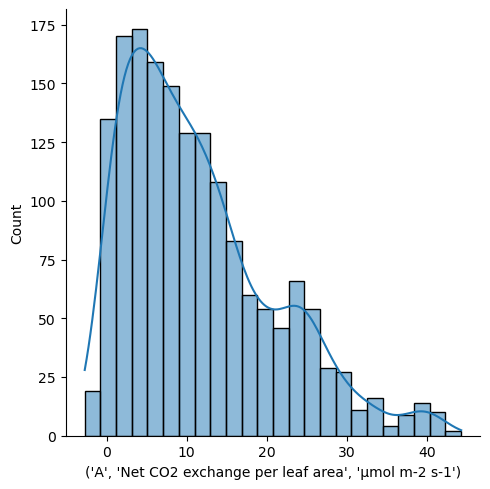

Visualizing ('CO2r', 'CO2 concentration in wet air entering chamber', 'μmol mol-1')


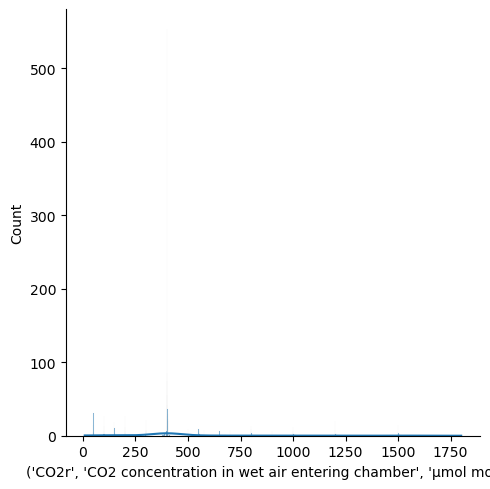

Visualizing ('Ci', 'Intercellular CO2 concentration in air', 'μmol mol-1')


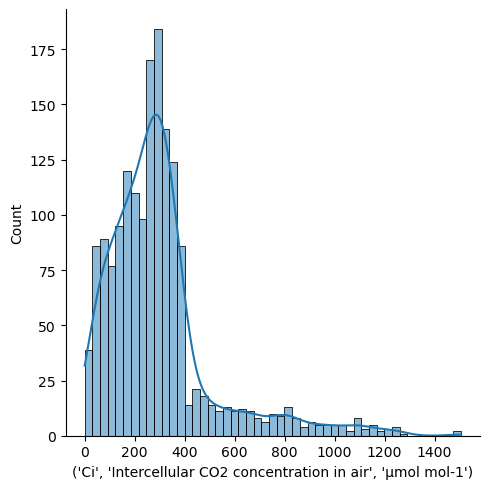

Visualizing ('plantForm', 'Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function', 1)


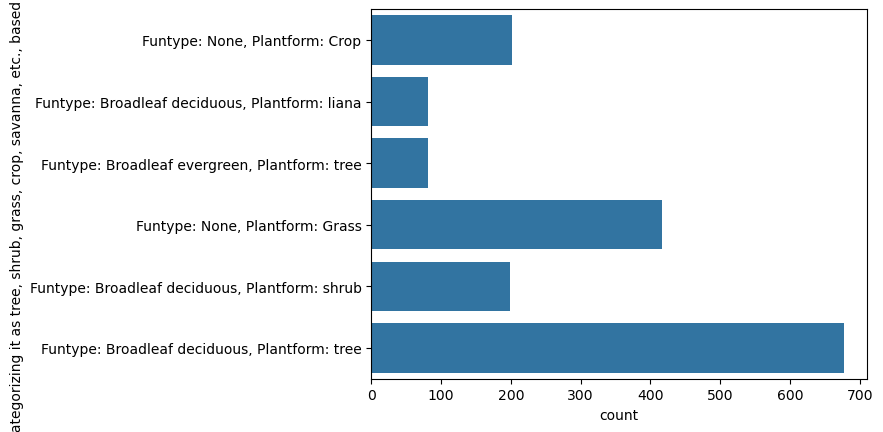

Visualizing ('replicate', 'Identification number indicating if a plant was measured more than once', 1)


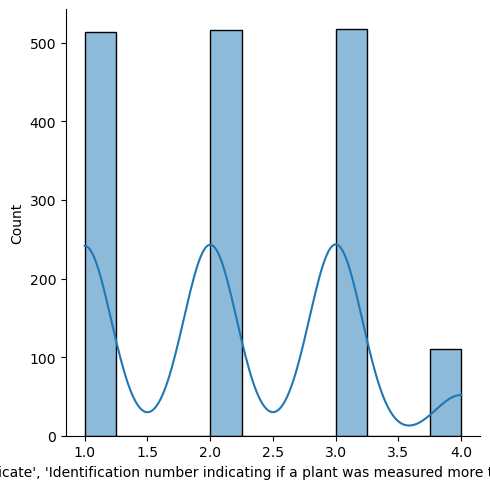

Visualizing ('Oatm', 'The pressure of oxygen in the air', 'kPa')


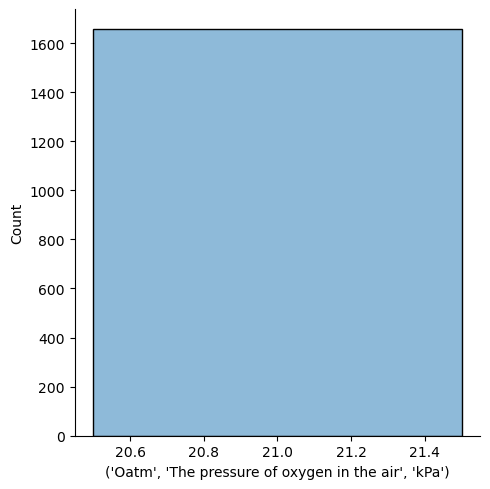

Visualizing ('Patm', 'Atmospheric pressure of the air', 'kPa')


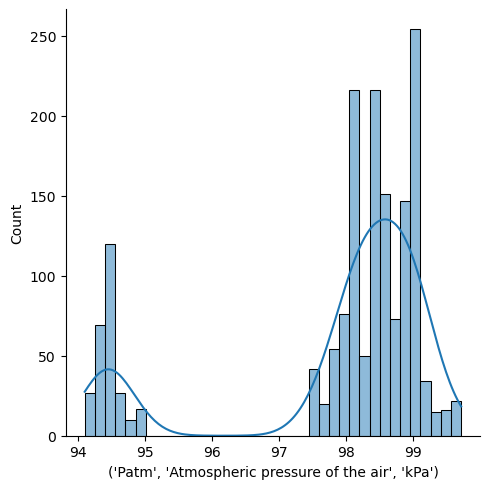

Visualizing ('species', 'Full species name and subspecies if applicable', 1)


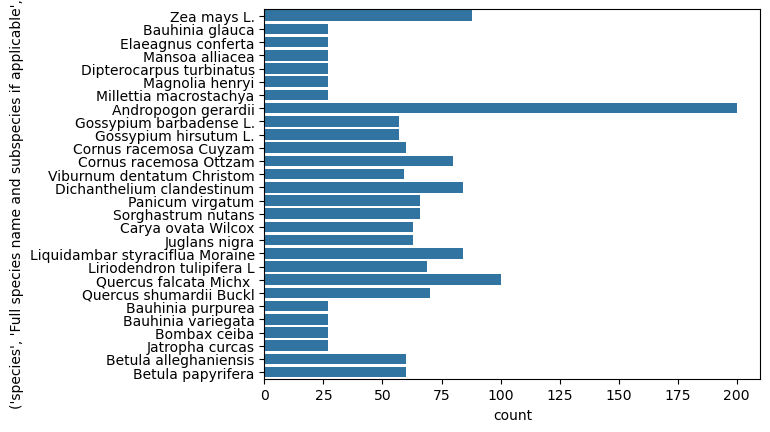

Visualizing ('Tleaf', 'Leaf surface temperature', 'degree_C')


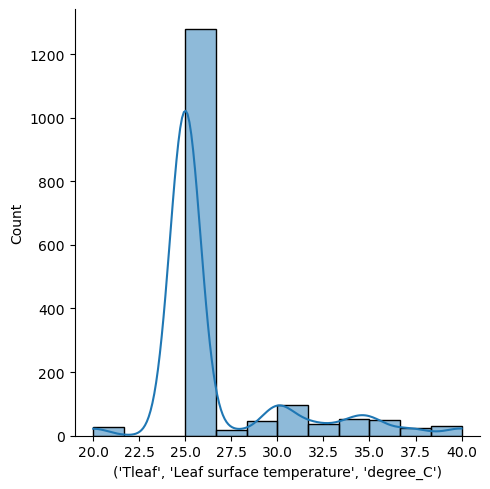

Visualizing ('plantBiome', 'Classification of the biome based on climate and ecological characteristics, such as arctic, boreal, temperate, or tropical', 1)


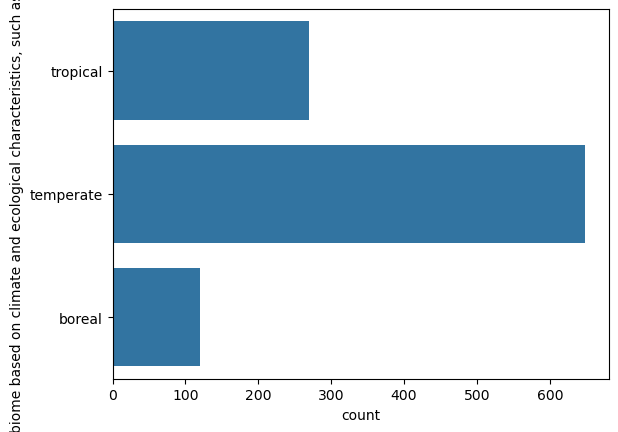

Visualizing ('VPDleaf', 'Leaf to air vapor pressure deficit', 'kPa')


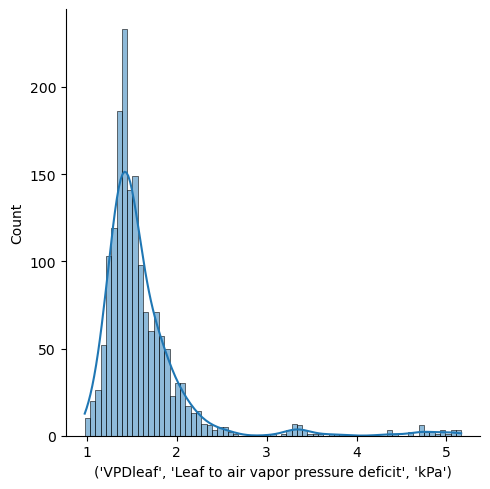

Visualizing ('siteIdentifier', 'Location descriptor of where data was collected', 1)


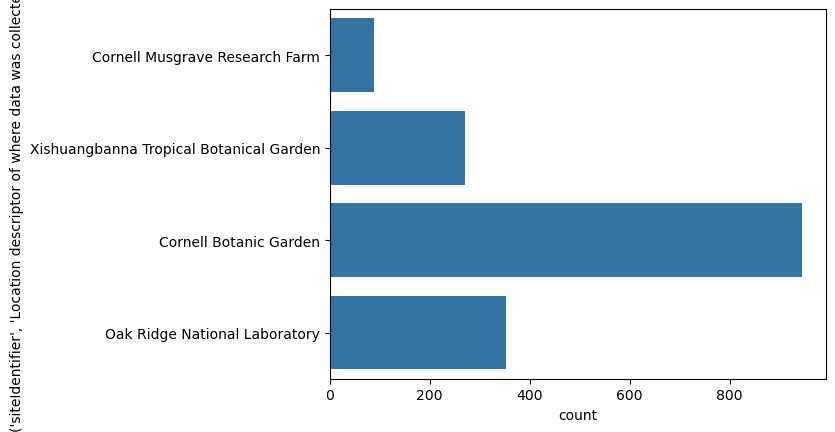

Visualizing ('latitudeY', 'Latitude coordinate of the site', 'degree')


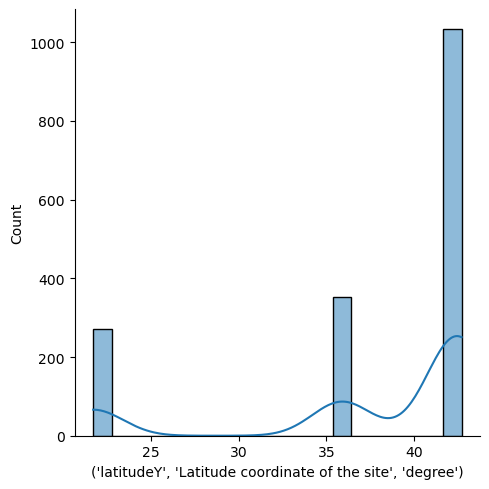

Visualizing ('longitudeX', 'Longitude coordinate of the site', 'degree')


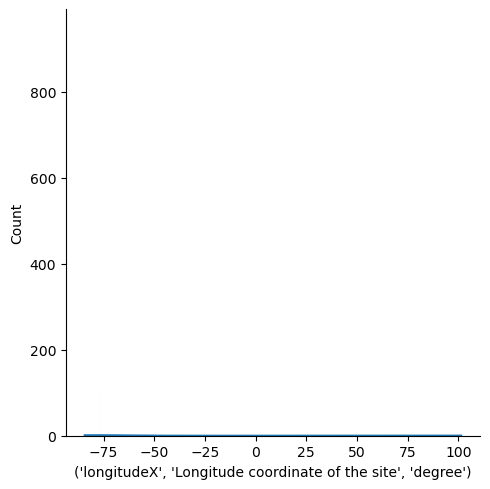

Visualizing ('growthEnvironment', 'Growth conditions of the plant, indicating whether it is growing under ambient (normal) or stressed conditions', 1)


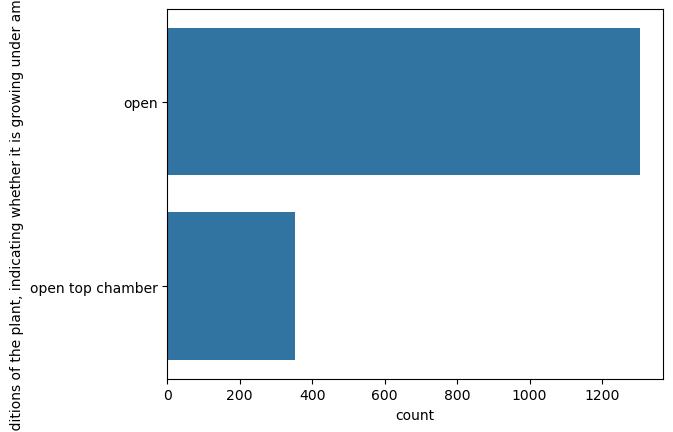

Visualizing ('experimentalManipulation', 'Experimental treatment(s) applied to the plant', 1)


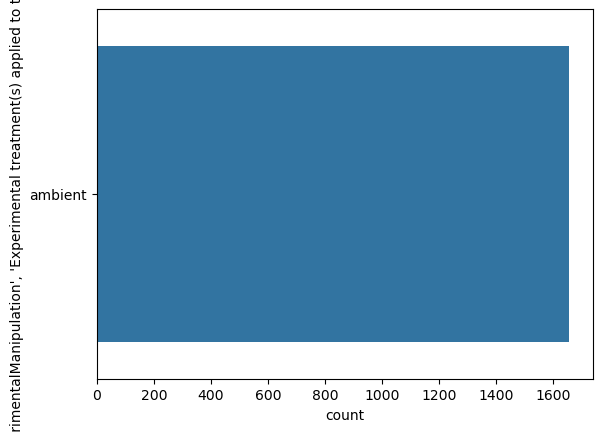

Visualizing ('month', 'Month of observation', 1)


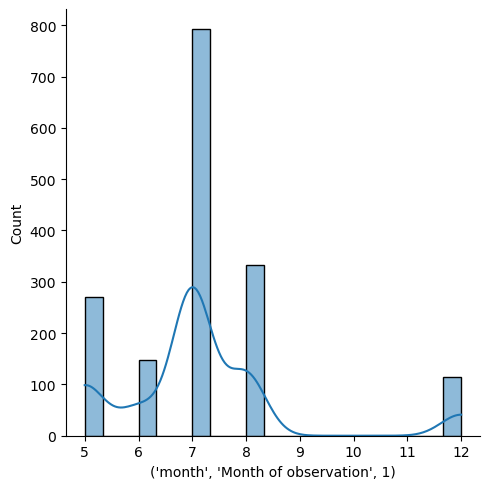

Visualizing ('year', 'Year of observation', 1)


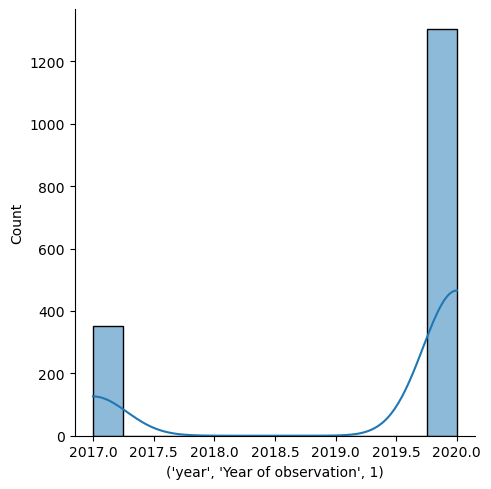

In [27]:
# Iterate over filtered_standard_data columns and visualize
for col in filtered_standard_data.columns:
    print(f"Visualizing {col}")
    funcs.visualize_all_columns(filtered_standard_data[col])

---
---
## 4. Quality Control

---
### 4.1. Strings

In [28]:
# general string cleaning
def clean_string_columns(df):
    # Select only object (string) dtype columns
    string_columns = df.select_dtypes(include=['object']).columns
    df.loc[:, string_columns] = df.loc[:, string_columns].apply(lambda col: col.str.strip().str.lower().str.replace('_', ' '))
    return df

# Apply the function to your DataFrame
filtered_standard_data = clean_string_columns(filtered_standard_data)

In [29]:
# Replace specific values with None
values_to_replace = [-999, -9999, 'none', 'None', np.nan]
filtered_standard_data = filtered_standard_data.replace(values_to_replace, None)

---
### 4.2. Measurement device
There is no measurement device column. This should be found and added to metadata

In [30]:
# everything is licor 6800
filtered_standard_data[('measurementDevice', 'Name of the instrument that collected data', 1)] = 'licor 6800'

---
### 4.3. Growth Environment
There is no measurement device column. This should be found and added to metadata

In [31]:
filtered_standard_data[('growthEnvironment', 
                        'Growth conditions of the plant, indicating whether it is growing under ambient (normal) or stressed conditions', 
                        1)].unique()

array(['open', 'open top chamber'], dtype=object)

---
### 4.4. Site Identifier
Need to drop the species information from it

In [32]:
filtered_standard_data[('siteIdentifier', 
                        'Location descriptor of where data was collected', 
                        1)].unique()

array(['cornell musgrave research farm',
       'xishuangbanna tropical botanical garden',
       'cornell botanic garden', 'oak ridge national laboratory'],
      dtype=object)

---
### 4.5. Plant Form

In [33]:
filtered_standard_data[('plantForm', 
                        'Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function', 
                        1)].unique()

array(['funtype: none, plantform: crop',
       'funtype: broadleaf deciduous, plantform: liana',
       'funtype: broadleaf evergreen, plantform: tree',
       'funtype: none, plantform: grass',
       'funtype: broadleaf deciduous, plantform: shrub',
       'funtype: broadleaf deciduous, plantform: tree'], dtype=object)

In [35]:
replacements = {'funtype: none, plantform: crop': 'forb',
                'funtype: broadleaf deciduous, plantform: liana': 'deciduous vine',
                'funtype: broadleaf evergreen, plantform: tree': 'evergreen tree',
                'funtype: none, plantform: grass': 'graminoid',
                'funtype: broadleaf deciduous, plantform: shrub': 'deciduous shrub',
                'funtype: broadleaf deciduous, plantform: tree': 'deciduous tree'}

filtered_standard_data[('plantForm', 
                        'Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function', 
                        1)] = filtered_standard_data[('plantForm', 
                                                      'Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function', 
                                                      1)].replace(replacements)

---
### 4.6. Plant Biome

In [36]:
filtered_standard_data[('plantBiome',
                        'Classification of the biome based on climate and ecological characteristics, such as arctic, boreal, temperate, or tropical', 
                        1)].unique()

array([None, 'tropical', 'temperate', 'boreal'], dtype=object)

---
### 4.7. Experimental Manipulation
ambient, co2, shading, water, ozone, co2, temperature

In [37]:
filtered_standard_data[('experimentalManipulation', 
                        'Experimental treatment(s) applied to the plant', 
                        1)].unique()

array(['ambient'], dtype=object)

---
### 4.8. Species names
For this Lin 2015 data, I wanted a visual aid to make sure I was adjusting species names correctly, so I generated a unique ID for each data source and species. That way, I can capture when a data source recorded information for multiple species

In [38]:
filtered_standard_data[('species', 'Full species name and subspecies if applicable', 1)].unique()

array(['zea mays l.', 'bauhinia glauca', 'elaeagnus conferta',
       'mansoa alliacea', 'dipterocarpus turbinatus', 'magnolia henryi',
       'millettia macrostachya', 'andropogon gerardii',
       'gossypium barbadense l.', 'gossypium hirsutum l.',
       'cornus racemosa cuyzam', 'cornus racemosa ottzam',
       'viburnum dentatum christom', 'dichanthelium clandestinum',
       'panicum virgatum', 'sorghastrum nutans', 'carya ovata wilcox',
       'juglans nigra', 'liquidambar styraciflua moraine',
       'liriodendron tulipifera l', 'quercus falcata michx',
       'quercus shumardii buckl', 'bauhinia purpurea',
       'bauhinia variegata', 'bombax ceiba', 'jatropha curcas',
       'betula alleghaniensis', 'betula papyrifera'], dtype=object)

In [39]:
# instantiate species checklist
u_species = filtered_standard_data[[('species', 'Full species name and subspecies if applicable', 1),
                                    ('plantForm', 'Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function', 1)]].drop_duplicates()
u_species.columns = u_species.columns.get_level_values(0)
u_species = u_species.rename(columns={'species':'unadjudicatedName'})
u_species = u_species.sort_values(by='unadjudicatedName')
u_species

,unadjudicatedName,plantForm
250,andropogon gerardii,graminoid
88,bauhinia glauca,deciduous vine
1428,bauhinia purpurea,deciduous tree
1455,bauhinia variegata,deciduous tree
1536,betula alleghaniensis,deciduous tree
1596,betula papyrifera,deciduous tree
1482,bombax ceiba,deciduous tree
979,carya ovata wilcox,deciduous tree
499,cornus racemosa cuyzam,deciduous shrub
559,cornus racemosa ottzam,deciduous shrub


---
#### 4.8.1 Instantiate the species lookup table as `filename_species_lookup.csv`

In [40]:
# add missing columns
u_species['acceptedName'] = None
u_species['nameAuthor'] = None
u_species['nameAuthority'] = None
u_species['nameCategory'] = None
u_species['nameAdjudicator'] = None
u_species['plantType'] = None
u_species['plantLeaf'] = None

# export checklist
u_species.to_csv(f'../data/temp/species/{filename}_species_lookup.csv')

---
### 4.8.2 Fill in the lookup table information save as `filename_species_lookup_01.csv`
We recommend passing this task on to an expert who can parse through synonymous, mispelled, and misapplied names

In [41]:
# load edited species checklist (species_checklist_01)
species_checklist = pd.read_csv(f'../data/temp/species/{filename}_species_lookup_01.csv', index_col=0)
species_checklist = species_checklist.replace({np.nan: None})
species_checklist

,unadjudicatedName,plantForm,acceptedName,nameAuthor,nameAuthority,nameCategory,nameAdjudicator,plantType,plantLeaf
250,andropogon gerardii,graminoid,andropogon gerardii,None,None,species,None,None,angiosperm
88,bauhinia glauca,vine,bauhinia glauca,None,None,species,None,deciduous,angiosperm
1428,bauhinia purpurea,tree,bauhinia purpurea,None,None,species,None,deciduous,angiosperm
1455,bauhinia variegata,tree,bauhinia variegata,None,None,species,None,deciduous,angiosperm
1536,betula alleghaniensis,tree,betula alleghaniensis,None,None,species,None,deciduous,angiosperm
1596,betula papyrifera,tree,betula papyrifera,None,None,species,None,deciduous,angiosperm
1482,bombax ceiba,tree,bombax ceiba,None,None,species,None,deciduous,angiosperm
979,carya ovata wilcox,tree,carya ovata,None,None,species,None,deciduous,angiosperm
499,cornus racemosa cuyzam,shrub,cornus racemosa,None,None,species,None,deciduous,angiosperm
559,cornus racemosa ottzam,shrub,cornus racemosa,None,None,species,None,deciduous,angiosperm


#### 4.8.3. Format the lookup table headers for merging new columns to the data

In [43]:
# make single headers into multi-headers
new_columns = pd.MultiIndex.from_tuples([
    ('unadjudicatedName', 'Full species name and subspecies if applicable', 1),  # Matching the multi-header in filtered_standard_data2
    ('plantForm', 'Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function', 1),
    ('acceptedName', 'The accepted species name assigned by the adjudicator', 1),
    ('nameAuthor', 'The author of the accepted species name', 1),
    ('nameAuthority', 'The authority that was referenced to assign the accepted species name', 1),
    ('nameCategory', 'The taxonomic heirarchy level at which the plant was named (family, genus, species, subspecies, variety, type)', 1),
    ('nameAdjudicator', 'The expert that assigned an unadjudicated species name to an accepted species name', 1),
    ('plantType', 'Classification of plant as either gymnosperm or angiosperm, indicating differences in reproductive structures and evolutionary lineage', 1),
    ('plantLeaf', 'Leaf lifespan strategy of the plant, categorizing it as evergreen or deciduous based on leaf retention patterns', 1)
])
species_checklist.columns = new_columns
species_checklist

,unadjudicatedName,plantForm,acceptedName,nameAuthor,nameAuthority,nameCategory,nameAdjudicator,plantType,plantLeaf
,Full species name and subspecies if applicable,"Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function",The accepted species name assigned by the adjudicator,The author of the accepted species name,The authority that was referenced to assign the accepted species name,"The taxonomic heirarchy level at which the plant was named (family, genus, species, subspecies, variety, type)",The expert that assigned an unadjudicated species name to an accepted species name,"Classification of plant as either gymnosperm or angiosperm, indicating differences in reproductive structures and evolutionary lineage","Leaf lifespan strategy of the plant, categorizing it as evergreen or deciduous based on leaf retention patterns"
,1,1,1,1,1,1,1,1,1
250,andropogon gerardii,graminoid,andropogon gerardii,None,None,species,None,None,angiosperm
88,bauhinia glauca,vine,bauhinia glauca,None,None,species,None,deciduous,angiosperm
1428,bauhinia purpurea,tree,bauhinia purpurea,None,None,species,None,deciduous,angiosperm
1455,bauhinia variegata,tree,bauhinia variegata,None,None,species,None,deciduous,angiosperm
1536,betula alleghaniensis,tree,betula alleghaniensis,None,None,species,None,deciduous,angiosperm
1596,betula papyrifera,tree,betula papyrifera,None,None,species,None,deciduous,angiosperm
1482,bombax ceiba,tree,bombax ceiba,None,None,species,None,deciduous,angiosperm
979,carya ovata wilcox,tree,carya ovata,None,None,species,None,deciduous,angiosperm


#### 4.8.4. Merge the species data to filtered_standard_data

In [44]:
# merge checklist to filtered_standard_data
merged_df = pd.merge(
    filtered_standard_data,
    species_checklist,
    left_on=[('species', 'Full species name and subspecies if applicable', 1)],
    right_on=[('unadjudicatedName', 'Full species name and subspecies if applicable', 1)],
    how='left'
)

#### 4.8.5. Drop some overlapped columns from the merged dataframe

In [45]:
# rename columns
columns_to_drop = [('plantForm_x', 'Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function', 1),
                   ('species', 'Full species name and subspecies if applicable', 1)]

# Drop the specified columns
merged_df = merged_df.drop(columns=columns_to_drop, axis=1)
merged_df.columns = pd.MultiIndex.from_tuples([
    (col[0].replace('_y', ''), *col[1:]) for col in merged_df.columns
])
merged_df.head(3)

,A,CO2r,Ci,replicate,Oatm,Patm,Tleaf,plantBiome,VPDleaf,siteIdentifier,...,measurementDevice,unadjudicatedName,plantForm,acceptedName,nameAuthor,nameAuthority,nameCategory,nameAdjudicator,plantType,plantLeaf
,Net CO2 exchange per leaf area,CO2 concentration in wet air entering chamber,Intercellular CO2 concentration in air,Identification number indicating if a plant was measured more than once,The pressure of oxygen in the air,Atmospheric pressure of the air,Leaf surface temperature,"Classification of the biome based on climate and ecological characteristics, such as arctic, boreal, temperate, or tropical",Leaf to air vapor pressure deficit,Location descriptor of where data was collected,...,Name of the instrument that collected data,Full species name and subspecies if applicable,"Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function",The accepted species name assigned by the adjudicator,The author of the accepted species name,The authority that was referenced to assign the accepted species name,"The taxonomic heirarchy level at which the plant was named (family, genus, species, subspecies, variety, type)",The expert that assigned an unadjudicated species name to an accepted species name,"Classification of plant as either gymnosperm or angiosperm, indicating differences in reproductive structures and evolutionary lineage","Leaf lifespan strategy of the plant, categorizing it as evergreen or deciduous based on leaf retention patterns"
,μmol m-2 s-1,μmol mol-1,μmol mol-1,1,kPa,kPa,degree_C,1,kPa,1,...,1,1,1,1,1,1,1,1,1,1
0,33.29238,400.4403,149.8772,1,21,98.95,25.0,None,1.383137,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm
1,30.19987,400.9609,155.0055,1,21,98.95,25.0,None,1.419416,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm
2,26.56009,401.0883,164.6963,1,21,98.95,25.0,None,1.452015,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm


---
---
## 5. Unit conversion

In [46]:
merged_df.columns.tolist()

[('A', 'Net CO2 exchange per leaf area', 'μmol m-2 s-1'),
 ('CO2r', 'CO2 concentration in wet air entering chamber', 'μmol mol-1'),
 ('Ci', 'Intercellular CO2 concentration in air', 'μmol mol-1'),
 ('replicate',
  'Identification number indicating if a plant was measured more than once',
  1),
 ('Oatm', 'The pressure of oxygen in the air', 'kPa'),
 ('Patm', 'Atmospheric pressure of the air', 'kPa'),
 ('Tleaf', 'Leaf surface temperature', 'degree_C'),
 ('plantBiome',
  'Classification of the biome based on climate and ecological characteristics, such as arctic, boreal, temperate, or tropical',
  1),
 ('VPDleaf', 'Leaf to air vapor pressure deficit', 'kPa'),
 ('siteIdentifier', 'Location descriptor of where data was collected', 1),
 ('latitudeY', 'Latitude coordinate of the site', 'degree'),
 ('longitudeX', 'Longitude coordinate of the site', 'degree'),
 ('growthEnvironment',
  'Growth conditions of the plant, indicating whether it is growing under ambient (normal) or stressed conditions

In [47]:
column_data_types = {('A', 'Net CO2 exchange per leaf area', 'μmol m-2 s-1'):'Float64',
                     ('CO2r', 'CO2 concentration in wet air entering chamber', 'μmol mol-1'):'Float64',
                     ('Ci', 'Intercellular CO2 concentration in air', 'μmol mol-1'):'Float64',
                     ('replicate', 'Identification number indicating if a plant was measured more than once', 1):'str',
                     ('Oatm', 'The pressure of oxygen in the air', 'kPa'):'Float64',
                     ('Patm', 'Atmospheric pressure of the air', 'kPa'):'Float64',
                     ('Tleaf', 'Leaf surface temperature', 'degree_C'):'Float64',
                     ('plantBiome', 'Classification of the biome based on climate and ecological characteristics, such as arctic, boreal, temperate, or tropical', 1):'str',
                     ('VPDleaf', 'Leaf to air vapor pressure deficit', 'kPa'):'Float64',
                     ('siteIdentifier', 'Location descriptor of where data was collected', 1):'str',
                     ('latitudeY', 'Latitude coordinate of the site', 'degree'):'Float64',
                     ('longitudeX', 'Longitude coordinate of the site', 'degree'):'Float64',
                     ('growthEnvironment', 'Growth conditions of the plant, indicating whether it is growing under ambient (normal) or stressed conditions', 1):'str',
                     ('experimentalManipulation', 'Experimental treatment(s) applied to the plant', 1):'str',
                     ('month', 'Month of observation', 1):'Int64',
                     ('year', 'Year of observation', 1):'Int64',
                     ('measurementDevice', 'Name of the instrument that collected data', 1):'str',
                     ('unadjudicatedName', 'Full species name and subspecies if applicable', 1):'str',
                     ('plantType', 'Classification of plant as either gymnosperm or angiosperm, indicating differences in reproductive structures and evolutionary lineage', 1):'str',
                     ('plantLeaf', 'Leaf lifespan strategy of the plant, categorizing it as evergreen or deciduous based on leaf retention patterns', 1):'str',
                     ('plantForm', 'Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function', 1):'str',
                     ('acceptedName', 'The accepted species name assigned by the adjudicator', 1):'str',
                     ('nameAuthor', 'The author of the accepted species name', 1):'str',
                     ('nameAuthority', 'The authority that was referenced to assign the accepted species name', 1):'str',
                     ('nameCategory', 'The taxonomic heirarchy level at which the plant was named (family, genus, species, subspecies, variety, type)', 1):'str',
                     ('nameAdjudicator', 'The expert that assigned an unadjudicated species name to an accepted species name', 1):'str'}

In [48]:
# assign data types
merged_df = merged_df.astype(column_data_types)
merged_df.head(3)

,A,CO2r,Ci,replicate,Oatm,Patm,Tleaf,plantBiome,VPDleaf,siteIdentifier,...,measurementDevice,unadjudicatedName,plantForm,acceptedName,nameAuthor,nameAuthority,nameCategory,nameAdjudicator,plantType,plantLeaf
,Net CO2 exchange per leaf area,CO2 concentration in wet air entering chamber,Intercellular CO2 concentration in air,Identification number indicating if a plant was measured more than once,The pressure of oxygen in the air,Atmospheric pressure of the air,Leaf surface temperature,"Classification of the biome based on climate and ecological characteristics, such as arctic, boreal, temperate, or tropical",Leaf to air vapor pressure deficit,Location descriptor of where data was collected,...,Name of the instrument that collected data,Full species name and subspecies if applicable,"Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function",The accepted species name assigned by the adjudicator,The author of the accepted species name,The authority that was referenced to assign the accepted species name,"The taxonomic heirarchy level at which the plant was named (family, genus, species, subspecies, variety, type)",The expert that assigned an unadjudicated species name to an accepted species name,"Classification of plant as either gymnosperm or angiosperm, indicating differences in reproductive structures and evolutionary lineage","Leaf lifespan strategy of the plant, categorizing it as evergreen or deciduous based on leaf retention patterns"
,μmol m-2 s-1,μmol mol-1,μmol mol-1,1,kPa,kPa,degree_C,1,kPa,1,...,1,1,1,1,1,1,1,1,1,1
0,33.29238,400.4403,149.8772,1,21.0,98.95,25.0,None,1.383137,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm
1,30.19987,400.9609,155.0055,1,21.0,98.95,25.0,None,1.419416,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm
2,26.56009,401.0883,164.6963,1,21.0,98.95,25.0,None,1.452015,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm


Visualizing ('A', 'Net CO2 exchange per leaf area', 'μmol m-2 s-1')


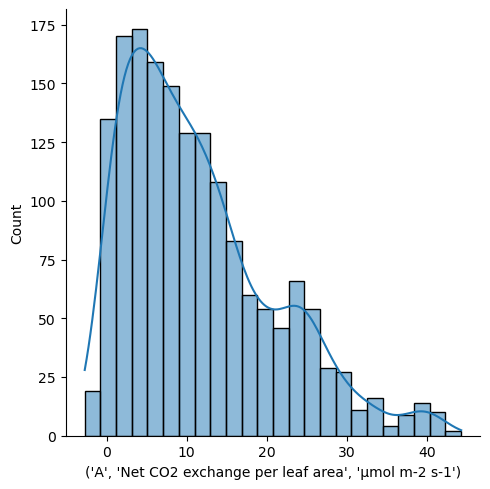

Visualizing ('CO2r', 'CO2 concentration in wet air entering chamber', 'μmol mol-1')


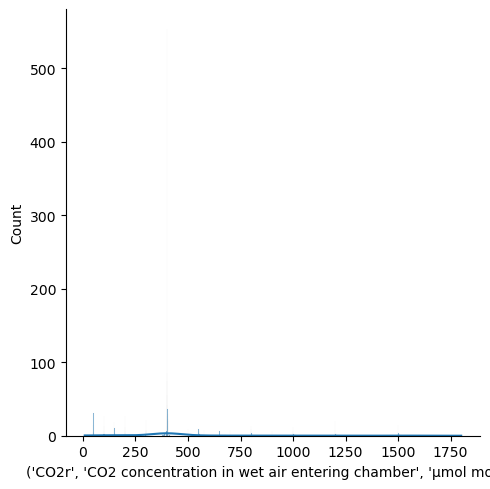

Visualizing ('Ci', 'Intercellular CO2 concentration in air', 'μmol mol-1')


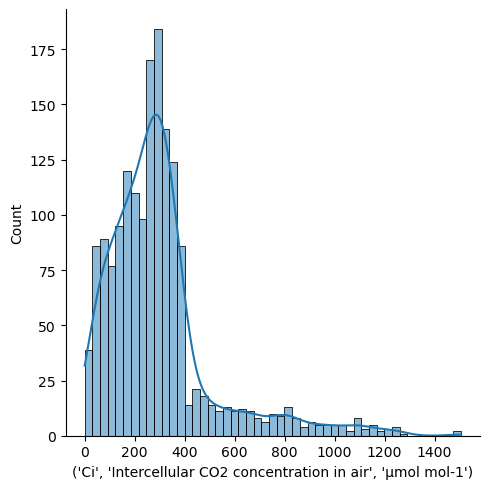

Visualizing ('replicate', 'Identification number indicating if a plant was measured more than once', 1)


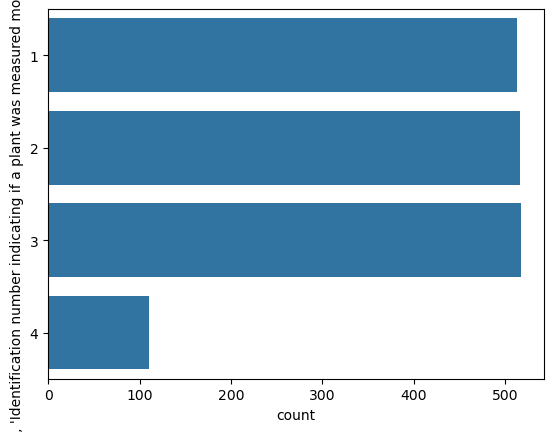

Visualizing ('Oatm', 'The pressure of oxygen in the air', 'kPa')


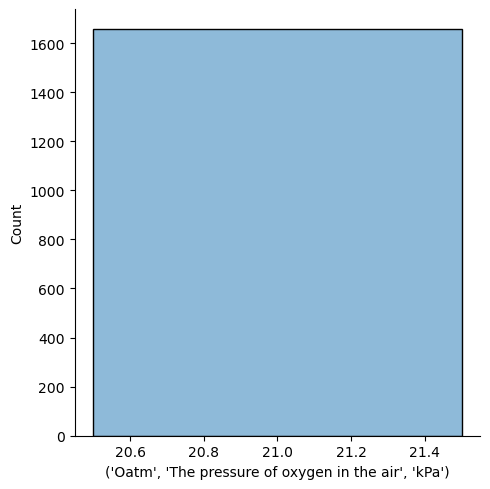

Visualizing ('Patm', 'Atmospheric pressure of the air', 'kPa')


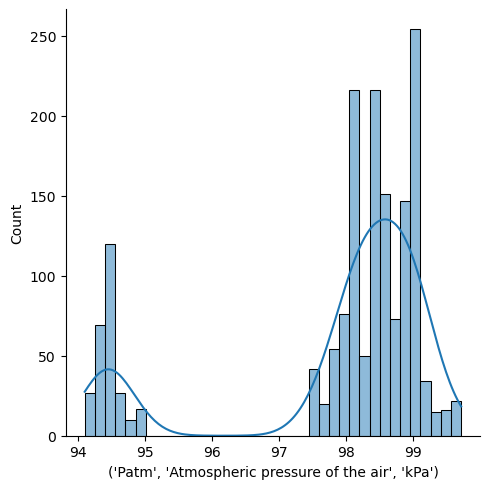

Visualizing ('Tleaf', 'Leaf surface temperature', 'degree_C')


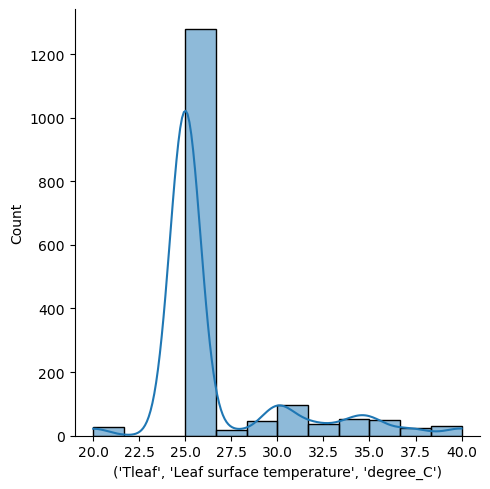

Visualizing ('plantBiome', 'Classification of the biome based on climate and ecological characteristics, such as arctic, boreal, temperate, or tropical', 1)


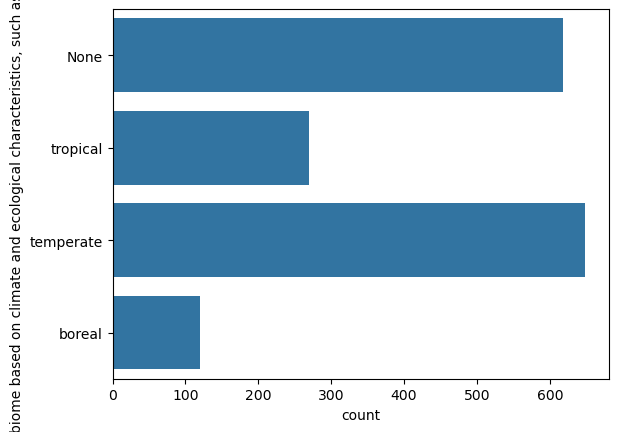

Visualizing ('VPDleaf', 'Leaf to air vapor pressure deficit', 'kPa')


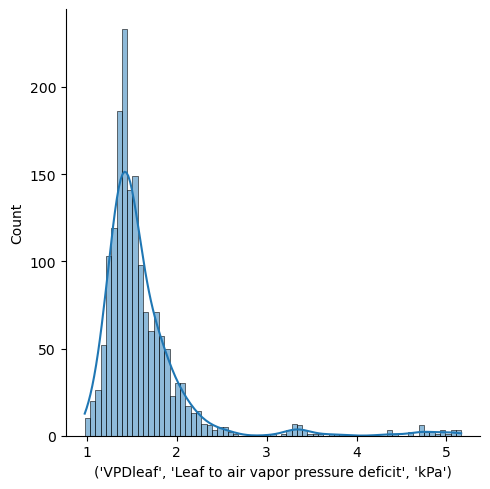

Visualizing ('siteIdentifier', 'Location descriptor of where data was collected', 1)


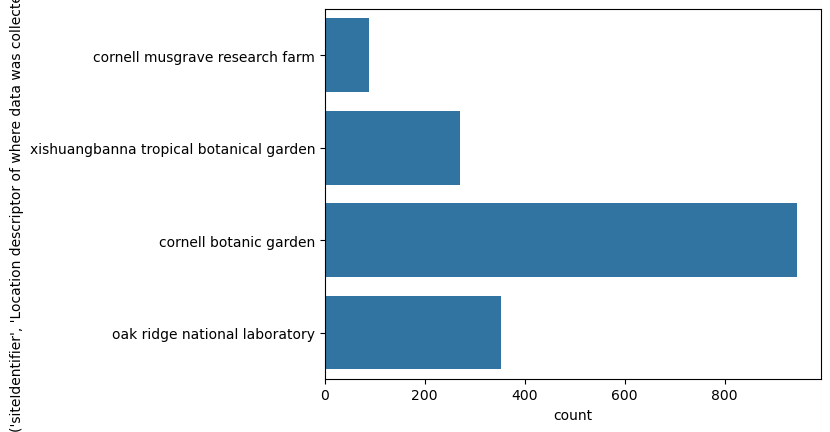

Visualizing ('latitudeY', 'Latitude coordinate of the site', 'degree')


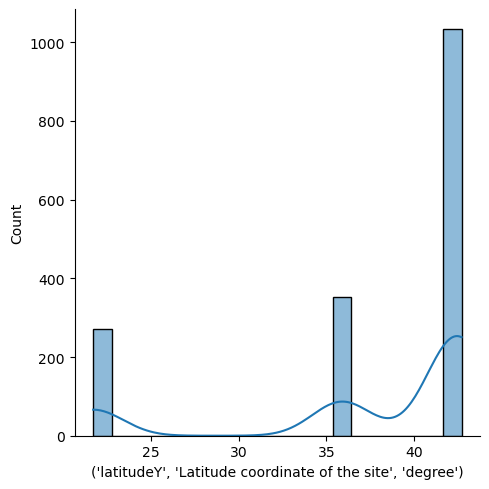

Visualizing ('longitudeX', 'Longitude coordinate of the site', 'degree')


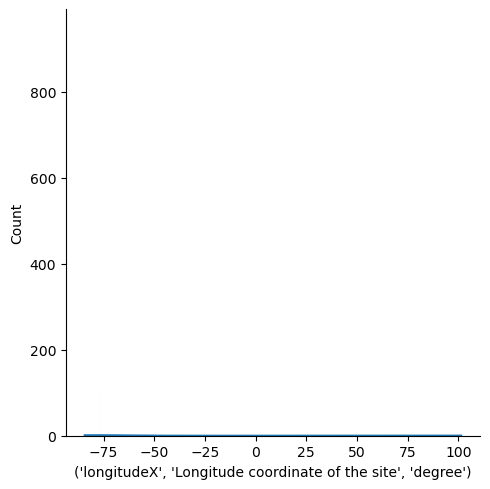

Visualizing ('growthEnvironment', 'Growth conditions of the plant, indicating whether it is growing under ambient (normal) or stressed conditions', 1)


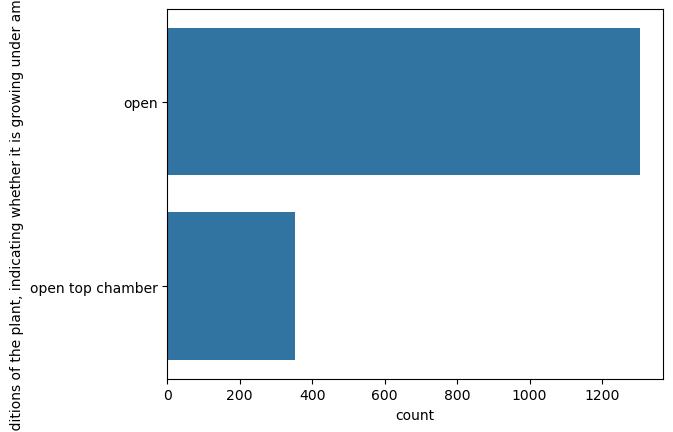

Visualizing ('experimentalManipulation', 'Experimental treatment(s) applied to the plant', 1)


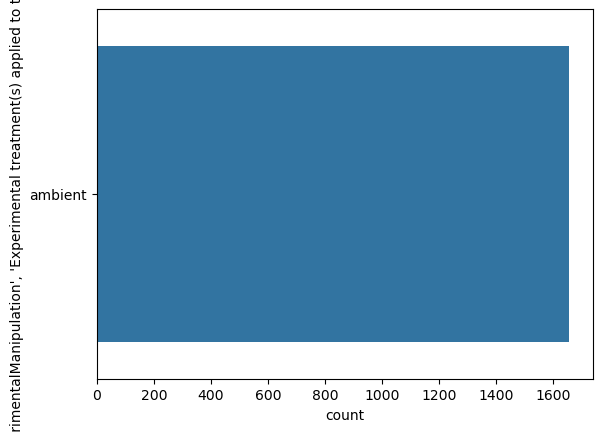

Visualizing ('month', 'Month of observation', 1)


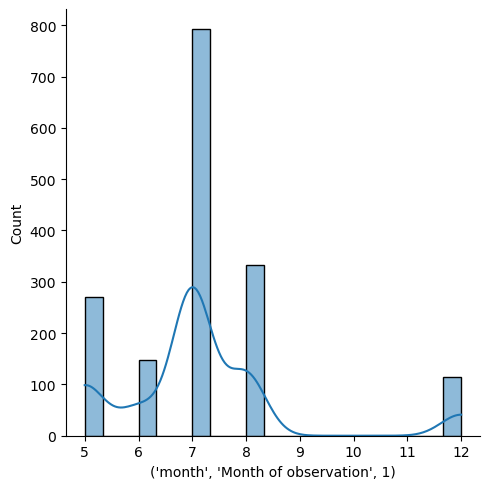

Visualizing ('year', 'Year of observation', 1)


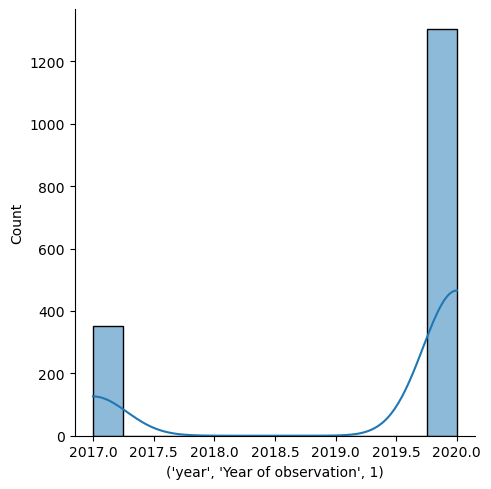

Visualizing ('measurementDevice', 'Name of the instrument that collected data', 1)


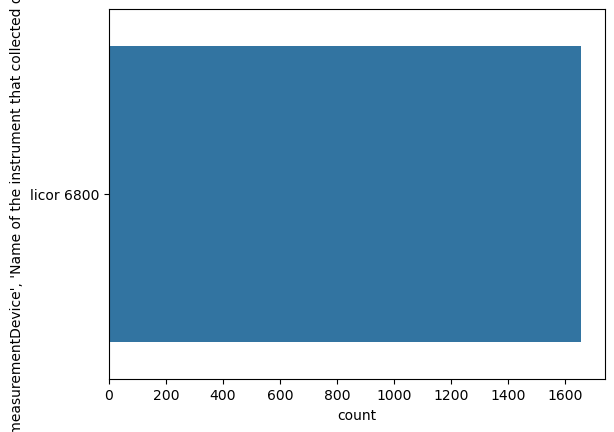

Visualizing ('unadjudicatedName', 'Full species name and subspecies if applicable', 1)


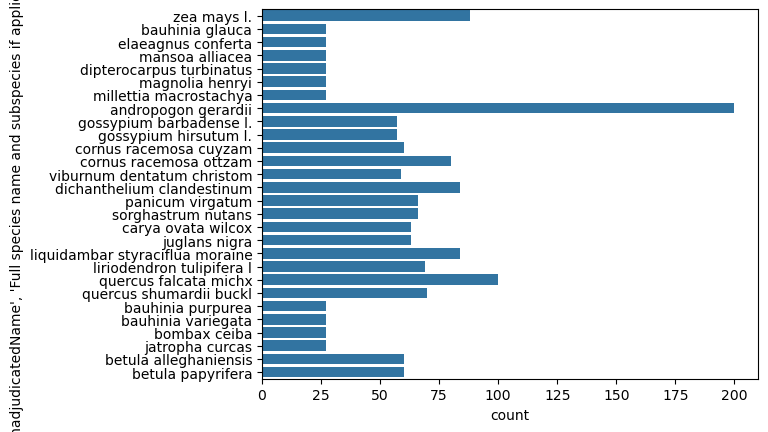

Visualizing ('plantForm', 'Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function', 1)


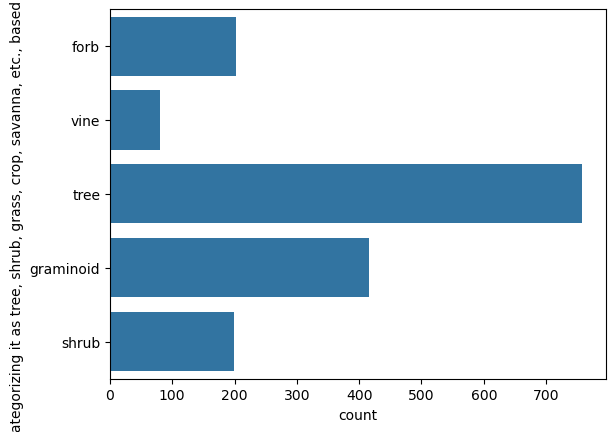

Visualizing ('acceptedName', 'The accepted species name assigned by the adjudicator', 1)


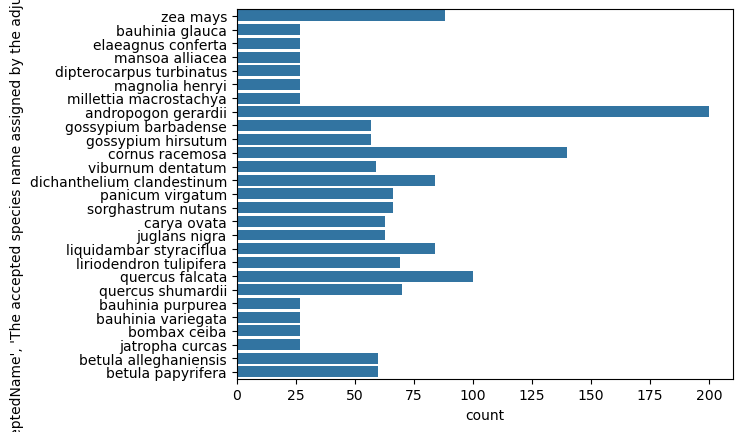

Visualizing ('nameAuthor', 'The author of the accepted species name', 1)


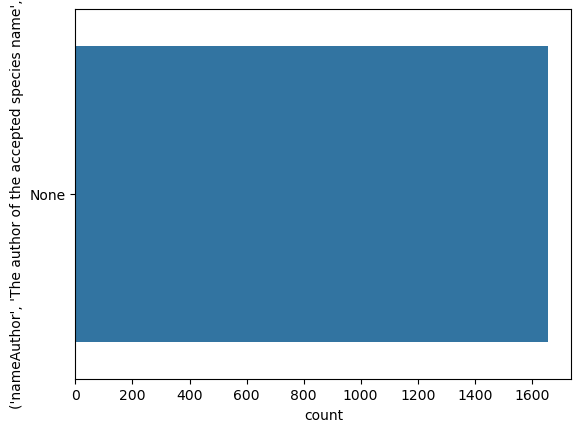

Visualizing ('nameAuthority', 'The authority that was referenced to assign the accepted species name', 1)


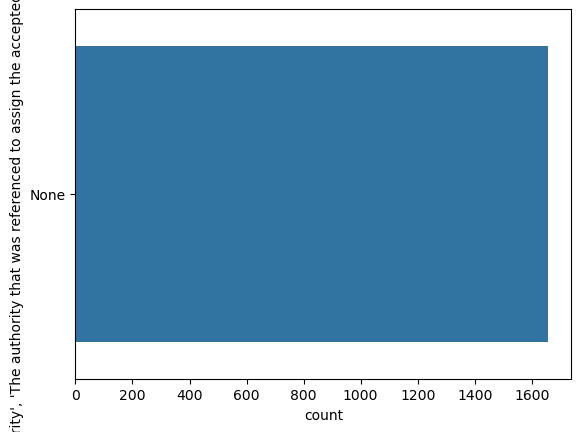

Visualizing ('nameCategory', 'The taxonomic heirarchy level at which the plant was named (family, genus, species, subspecies, variety, type)', 1)


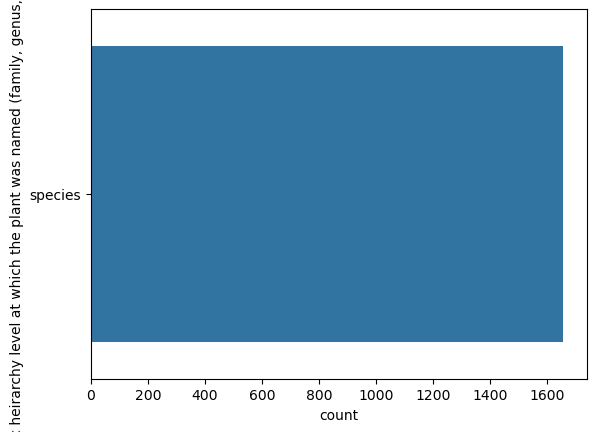

Visualizing ('nameAdjudicator', 'The expert that assigned an unadjudicated species name to an accepted species name', 1)


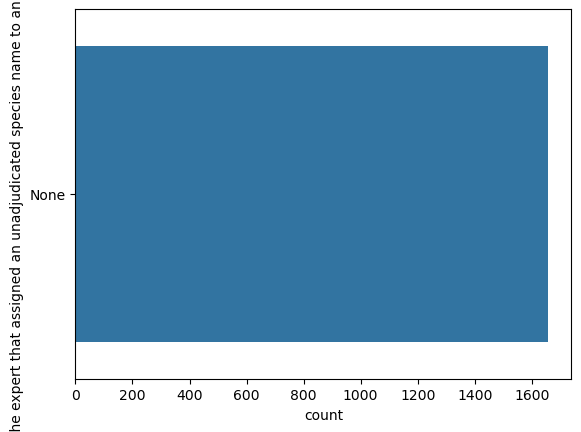

Visualizing ('plantType', 'Classification of plant as either gymnosperm or angiosperm, indicating differences in reproductive structures and evolutionary lineage', 1)


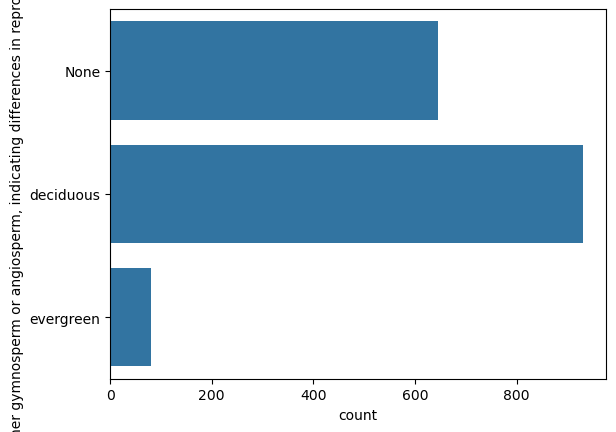

Visualizing ('plantLeaf', 'Leaf lifespan strategy of the plant, categorizing it as evergreen or deciduous based on leaf retention patterns', 1)


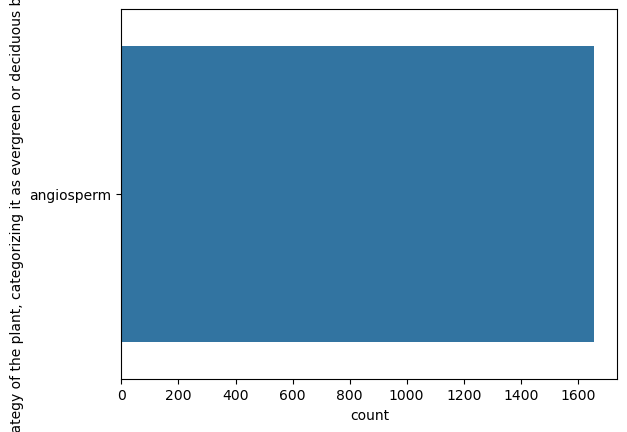

In [49]:
# Iterate over filtered_standard_data columns and visualize
for col in merged_df.columns:
    print(f"Visualizing {col}")
    funcs.visualize_all_columns(merged_df[col])

In [50]:
# Create a deep copy of merged_df
merged_df_2 = merged_df.copy(deep=True)
merged_df_2, preconverted_cols, converted_cols = funcs.check_and_convert_units(column_standards, merged_df_2)

In [51]:
preconverted_cols

[]

---
### 5.1. Visualize and confirm unit conversions

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_comparison(selected_col_1, selected_col_2, col_name):
    """
    Creates a subplot with one row and two columns comparing data from merged_df and filtered_df.
    - Ensures consistent bin sizes across both histograms, while allowing different x-axis ranges.
    
    Parameters:
    selected_col_1 (Series): Data for the left plot (from merged_df).
    selected_col_2 (Series): Data for the right plot (from filtered_df).
    col_name (str): The variable name being compared.
    """
    
    # Drop NaN values only for plotting
    col_1_no_nan = selected_col_1.dropna()
    col_2_no_nan = selected_col_2.dropna()
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Comparison of {col_name}', fontsize=16)
    
    # Check if the data is numeric
    if pd.api.types.is_numeric_dtype(col_1_no_nan):
        
        # Determine bin size based on the range of the first dataset
        min1, max1 = col_1_no_nan.min(), col_1_no_nan.max()
        min2, max2 = col_2_no_nan.min(), col_2_no_nan.max()
        
        # Define bin edges
        num_bins = 20
        bin_edges1 = np.linspace(min1, max1, num_bins + 1)
        bin_edges2 = np.linspace(min2, max2, num_bins + 1)

        # Plot numeric data with consistent bin sizes
        sns.histplot(col_1_no_nan, bins=bin_edges1, kde=True, ax=axes[0])
        axes[0].set_title('df1 (Numeric Data)')
        axes[0].axvline(col_1_no_nan.min(), color='green', linestyle='--', label=f'Min: {col_1_no_nan.min():.2f}')
        axes[0].axvline(col_1_no_nan.max(), color='purple', linestyle='--', label=f'Max: {col_1_no_nan.max():.2f}')
        axes[0].legend()

        sns.histplot(col_2_no_nan, bins=bin_edges2, kde=True, ax=axes[1], color='orange')
        axes[1].set_title('df2 (Numeric Data)')
        axes[1].axvline(col_2_no_nan.min(), color='green', linestyle='--', label=f'Min: {col_2_no_nan.min():.2f}')
        axes[1].axvline(col_2_no_nan.max(), color='purple', linestyle='--', label=f'Max: {col_2_no_nan.max():.2f}')
        axes[1].legend()
    
    else:
        # Plot categorical data if not numeric
        sns.countplot(y=col_1_no_nan, ax=axes[0], color='blue', legend=False)
        axes[0].set_title('df1 (Categorical Data)')
        
        sns.countplot(y=col_2_no_nan, ax=axes[1], color='orange', legend=False)
        axes[1].set_title('df2 (Categorical Data)')
    
    # Remove Y-axis labels
    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Now plot the comparison
for preconv_col, conv_col in zip(preconverted_cols, converted_cols):
    print(f'Visualizing {preconv_col} and {conv_col}')

    try:
        # Select columns using multi-level tuples
        selected_col_1 = merged_df[preconv_col].squeeze()
        selected_col_2 = merged_df_2[conv_col].squeeze()
        
        # Call the comparison plot function
        plot_comparison(selected_col_1, selected_col_2, preconv_col)

    except Exception as e:
        print(f'Could not plot...', e)

---
### 5.2. Drop out-of-range values per ESS-Dive leaf-gas-exchange info

In [53]:
oor = pd.read_csv('../data/supp/info_measured_variables.csv')
oor

,variableName,variableUnit,variableDescription,expectedValueRangeMin,expectedValueRangeMax
0,date,YYYY-MM-DD,Date of observation,NaN,NaN
1,time,HH:MM:SS,Time of observation,NaN,NaN
2,record,1,Observation record number,NaN,NaN
3,area,cm-2,Leaf area,NaN,NaN
4,A,µmol m-2 s-1,Net CO₂ exchange per leaf area,-20.0,120.0
5,Amax,µmol m-2 s-1,Highest rate of light and CO₂ saturated A,-20.0,120.0
6,Asat,µmol m-2 s-1,Highest rate of light saturated A at ambient C...,-20.0,120.0
7,Ci,µmol mol-1,Intercellular CO₂ concentration in air,0.0,5000.0
8,CO2r,µmol mol-1,CO₂ concentration in wet air entering chamber,0.0,5000.0
9,CO2s,µmol mol-1,CO₂ concentration in wet air inside chamber,0.0,5000.0


In [54]:
def filter_out_of_range_data(oor, df):
    """
    Filters out data in merged_df_2 that falls outside the expected value range specified in oor.
    Also handles potential unit errors for specific variables (e.g., Patm in hPa vs. kPa).
    Special case for RH: Values above 100 are capped at 100 instead of being removed.
    
    Parameters:
    oor (DataFrame): Contains columns variableName, variableUnit, variableDescription, 
                     expectedValueRangeMin, expectedValueRangeMax.
    merged_df_2 (DataFrame): A DataFrame with a 3-row multi-header.
    
    Returns:
    filtered_df (DataFrame): A copy of merged_df_2 with out-of-range values removed or capped.
    filtered_columns (list): List of multi-header column names where out-of-range data was removed or capped.
    """
    
    # Create a copy of merged_df_2 to avoid modifying the original DataFrame
    filtered_df = df.copy()

    # List to store multi-header column names where out-of-range data was removed or capped
    filtered_columns = []

    # Iterate over each row in oor
    for _, row in oor.iterrows():
        var_name = row['variableName']
        min_val = row['expectedValueRangeMin']
        max_val = row['expectedValueRangeMax']

        # Check if var_name exists in row 0 of the multi-header
        if var_name in filtered_df.columns.get_level_values(0):
            print(f"Match found for variable: {var_name}")

            # Select the corresponding column(s) in merged_df_2
            selected_cols = filtered_df.loc[:, filtered_df.columns.get_level_values(0) == var_name]

            try:
                # Attempt to convert to numeric (forcing errors to raise exceptions)
                selected_cols = selected_cols.apply(pd.to_numeric, errors='raise')

                # Store the count of non-NaN values before filtering
                count_before = selected_cols.count().sum()

                # Special handling for Patm: Check for potential hPa values mistakenly recorded as kPa
                if var_name == 'Patm':
                    print(f"Original Patm count: {count_before}")
                    suspect_values = selected_cols[selected_cols < 10]
                    print(f"Suspect Patm values count (less than 10 kPa): {suspect_values.count().sum()}")

                    if not suspect_values.empty:
                        print(f"Suspect values detected for {var_name}. Converting from hPa to kPa...")
                        # Convert suspect values from hPa to kPa by multiplying by 10
                        selected_cols = selected_cols.where(selected_cols >= 10, selected_cols * 10)
                    print(f"Patm count after conversion: {selected_cols.count().sum()}")

                # Special case for RH: Cap values above 100 at 100
                if 'RH' in var_name:
                    over_100_count = (selected_cols > 100).sum().sum()
                    if over_100_count > 0:
                        print(f"Special case for RH: Capping {over_100_count} values over 100 at 100.")
                        selected_cols = selected_cols.where(selected_cols <= 100, 100)

                # Apply min and max filtering using .where()
                if not pd.isna(min_val):
                    selected_cols = selected_cols.where(selected_cols >= min_val)
                if not pd.isna(max_val):
                    selected_cols = selected_cols.where(selected_cols <= max_val)

                # Store the count of non-NaN values after filtering
                count_after = selected_cols.count().sum()

                print(f"{var_name} count before filtering: {count_before}, count after filtering: {count_after}")

                # Check if any data was actually removed or capped
                if count_before > count_after or ('RH' in var_name and over_100_count > 0):
                    # Assign the filtered column back to filtered_df
                    filtered_df.loc[:, filtered_df.columns.get_level_values(0) == var_name] = selected_cols

                    # Add the multi-header column names to filtered_columns list
                    filtered_columns.extend(selected_cols.columns.tolist())

            except ValueError:
                # Skip columns that cannot be converted to numeric
                print(f"Skipping non-numeric variable: {var_name}")
        else:
            print(f"No match found for variable: {var_name}, skipping.")

    return filtered_df, filtered_columns

In [55]:
filtered_df, oor_cols = filter_out_of_range_data(oor, merged_df_2)
filtered_df

No match found for variable: date, skipping.
No match found for variable: time, skipping.
No match found for variable: record, skipping.
No match found for variable: area, skipping.
Match found for variable: A
A count before filtering: 1656, count after filtering: 1656
No match found for variable: Amax, skipping.
No match found for variable: Asat, skipping.
Match found for variable: Ci
Ci count before filtering: 1656, count after filtering: 1656
Match found for variable: CO2r
CO2r count before filtering: 1656, count after filtering: 1656
No match found for variable: CO2s, skipping.
No match found for variable: dCO2, skipping.
No match found for variable: dH2O, skipping.
No match found for variable: E, skipping.
No match found for variable: flow, skipping.
No match found for variable: gbw, skipping.
No match found for variable: gsw, skipping.
No match found for variable: H2Or, skipping.
No match found for variable: H2Os, skipping.
Match found for variable: Patm
Original Patm count: 1656

,A,CO2r,Ci,replicate,Oatm,Patm,Tleaf,plantBiome,VPDleaf,siteIdentifier,...,measurementDevice,unadjudicatedName,plantForm,acceptedName,nameAuthor,nameAuthority,nameCategory,nameAdjudicator,plantType,plantLeaf
,Net CO2 exchange per leaf area,CO2 concentration in wet air entering chamber,Intercellular CO2 concentration in air,Identification number indicating if a plant was measured more than once,The pressure of oxygen in the air,Atmospheric pressure of the air,Leaf surface temperature,"Classification of the biome based on climate and ecological characteristics, such as arctic, boreal, temperate, or tropical",Leaf to air vapor pressure deficit,Location descriptor of where data was collected,...,Name of the instrument that collected data,Full species name and subspecies if applicable,"Life form of the plant, categorizing it as tree, shrub, grass, crop, savanna, etc., based on growth form and ecological function",The accepted species name assigned by the adjudicator,The author of the accepted species name,The authority that was referenced to assign the accepted species name,"The taxonomic heirarchy level at which the plant was named (family, genus, species, subspecies, variety, type)",The expert that assigned an unadjudicated species name to an accepted species name,"Classification of plant as either gymnosperm or angiosperm, indicating differences in reproductive structures and evolutionary lineage","Leaf lifespan strategy of the plant, categorizing it as evergreen or deciduous based on leaf retention patterns"
,μmol m-2 s-1,μmol mol-1,μmol mol-1,1,kPa,kPa,degree_C,1,kPa,1,...,1,1,1,1,1,1,1,1,1,1
0,33.29238,400.4403,149.8772,1,21.0,98.95,25.0,None,1.383137,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm
1,30.19987,400.9609,155.0055,1,21.0,98.95,25.0,None,1.419416,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm
2,26.56009,401.0883,164.6963,1,21.0,98.95,25.0,None,1.452015,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm
3,18.52931,400.002,208.1738,1,21.0,98.95,25.0,None,1.492717,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm
4,11.33605,401.079,262.0181,1,21.0,98.95,25.0,None,1.529302,cornell musgrave research farm,...,licor 6800,zea mays l.,forb,zea mays,None,None,species,None,None,angiosperm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,17.60424,550.2006,304.9796,3,21.0,97.72,25.0,boreal,1.539059,cornell botanic garden,...,licor 6800,betula papyrifera,tree,betula papyrifera,None,None,species,None,deciduous,angiosperm
1652,22.41847,799.9424,488.4513,3,21.0,97.71,25.0,boreal,1.544358,cornell botanic garden,...,licor 6800,betula papyrifera,tree,betula papyrifera,None,None,species,None,deciduous,angiosperm


Visualizing ('VPDleaf', 'Leaf to air vapor pressure deficit', 'kPa')


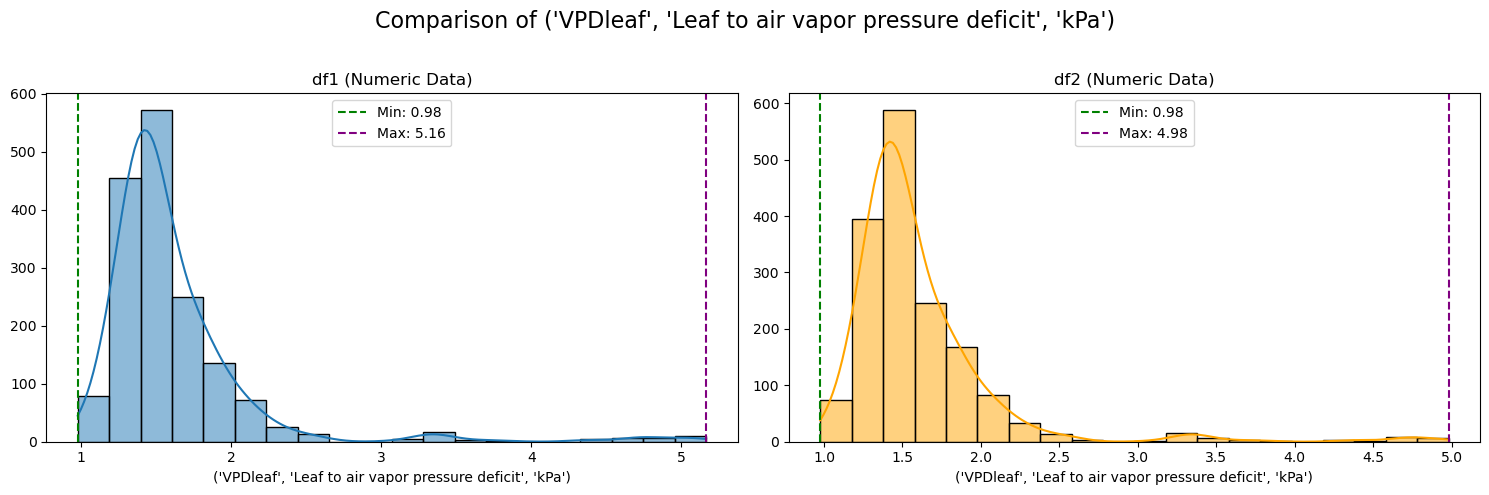

In [56]:
# Now plot the comparison
for oor_col in oor_cols:
    print(f'Visualizing {oor_col}')

    try:
        # Select columns using multi-level tuples
        selected_col_1 = merged_df_2[oor_col].squeeze()
        selected_col_2 = filtered_df[oor_col].squeeze()
        
        # Call the comparison plot function
        plot_comparison(selected_col_1, selected_col_2, oor_col)

    except Exception as e:
        print(f'Could not plot...', e)

In [57]:
# export
filtered_df.to_csv(f'../data/output/{filename}.csv', encoding='utf-8-sig')

In [58]:
# Create the profiling report
df = filtered_df.copy()
df.columns = df.columns.get_level_values(0)
profile = ProfileReport(df, title=f"{filename} Quality Controlled Profiling Report")

# Save the profile report as HTML
output_directory = f'../data/input/{filename}'
report_html_path = os.path.join(output_directory, f"{filename}_qc_report.html")
profile.to_file(report_html_path)
print(f"Profiling report saved as {report_html_path}")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved as ../data/input/han_2022/han_2022_qc_report.html
